<a href="https://colab.research.google.com/github/mayankrohilla-tech/Banking-Term-Deposit/blob/main/Banking_Term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banking Data

1. age (numeric).
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","selfemployed","retired","technician","services").
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed).
4. education (categorical: "unknown","secondary","primary","tertiary").
5. default: has credit in default? (binary: "yes","no").
6. balance: average yearly balance, in euros (numeric) .
7. housing: has housing loan? (binary: "yes","no").
8. loan: has personal loan? (binary: "yes","no")

#### Related with the last contact of the current campaign:
9. contact: contact communication type (categorical: "unknown","telephone","cellular") .
10. day: last contact day of the month (numeric).
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec").
12. duration: last contact duration, in seconds (numeric).
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted).
15. previous: number of contacts performed before this campaign and for this client (numeric).
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success").

-- ** TARGET ** --

17. y - has the client subscribed a term deposit? (binary: "yes","no")./

In [ ]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc)
from imblearn.over_sampling import SMOTE

# ignore warnigns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data= pd.read_excel('/content/drive/MyDrive/Data/Banking_Call_Data.xlsx')
data.shape

(45211, 17)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# null value check
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# data type
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
# number of unique classes in each columns
for cols in data.columns:
    if data[cols].dtype == "O":
        print(cols, ':', data[cols].nunique())

job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
poutcome : 4
y : 2


In [ ]:
print('\nStatistical Summary (Numerical Columns):\n')
print(data.describe())


print('\nStatistical Summary (Categorical Columns):\n')
print(data.describe(include='object'))


Statistical Summary (Numerical Columns):

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000 

 “The dataset contains both numerical and categorical features, making preprocessing and encoding essential before modeling.”

## df.describe() output shows:

Mean age ~40

Balance has large spread

Duration is right-skewed

Campaign & previous mostly low values

## Key insight

Balance and duration have outliers → need handling before modeling.

In [ ]:
print('\nNumber of Duplicate Rows:', data.duplicated().sum())


Number of Duplicate Rows: 0


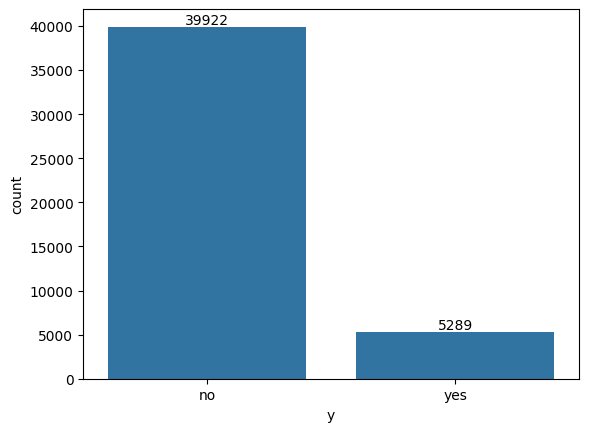

,proportion
y,
no,88.3
yes,11.7


In [ ]:
# analyse the target column
ax = sns.countplot(x='y', data=data, order=data['y'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

# proportion check
round(data['y'].value_counts(normalize=True)*100, 2)

You saw a bar chart:

No → ~40,000

Yes → ~5,000

Interpretation (VERY IMPORTANT)

## The target variable is highly imbalanced (~88% No, ~12% Yes).

“Due to class imbalance, accuracy alone is not sufficient; precision, recall, and F1-score should be considered.”

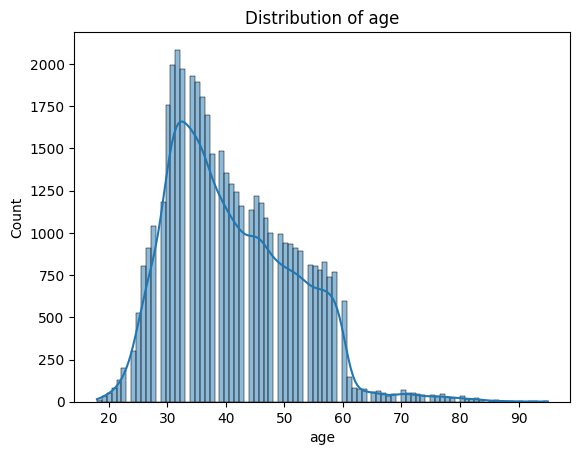

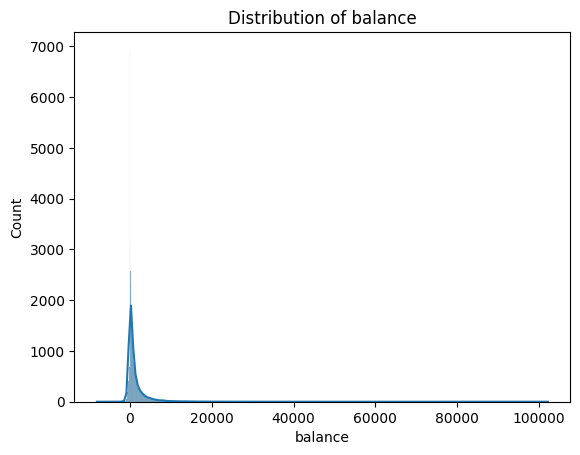

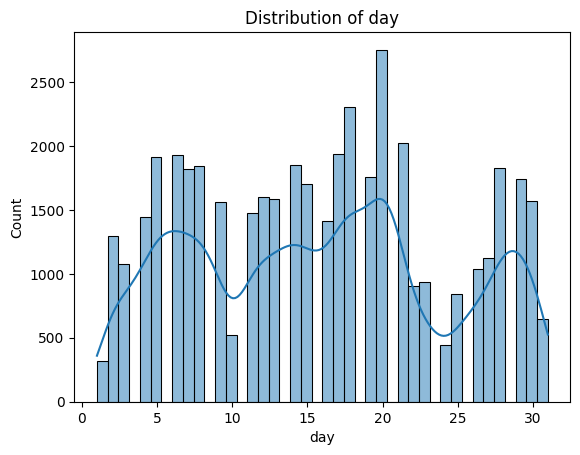

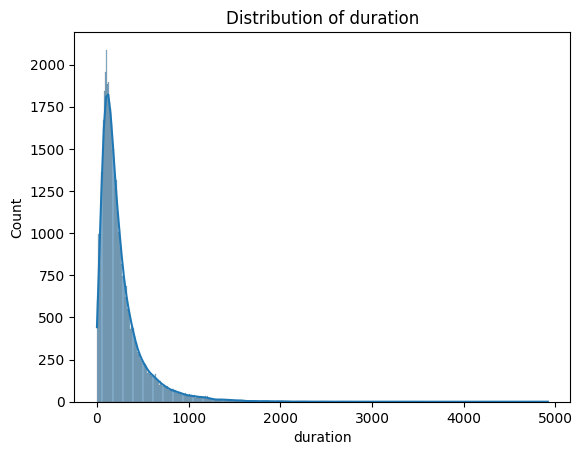

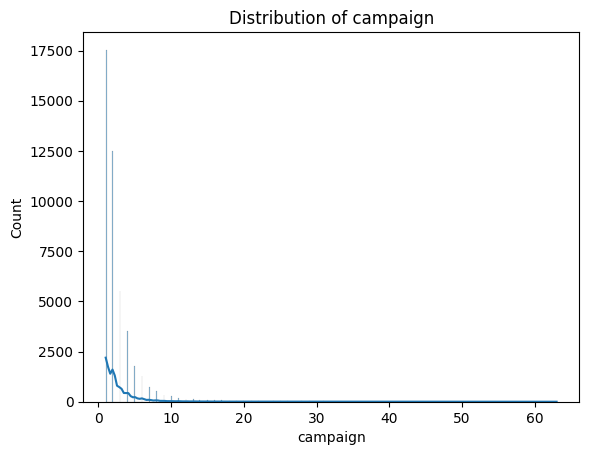

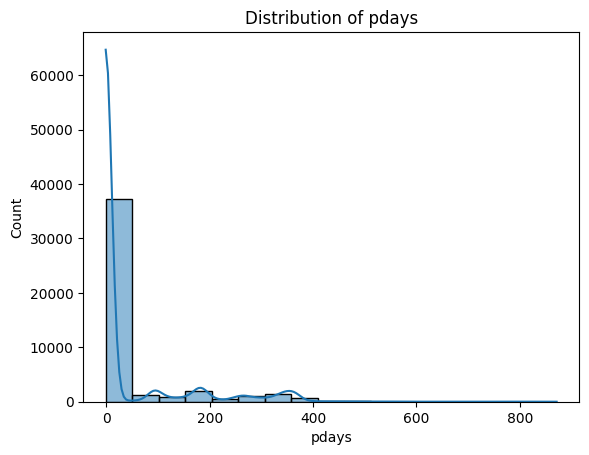

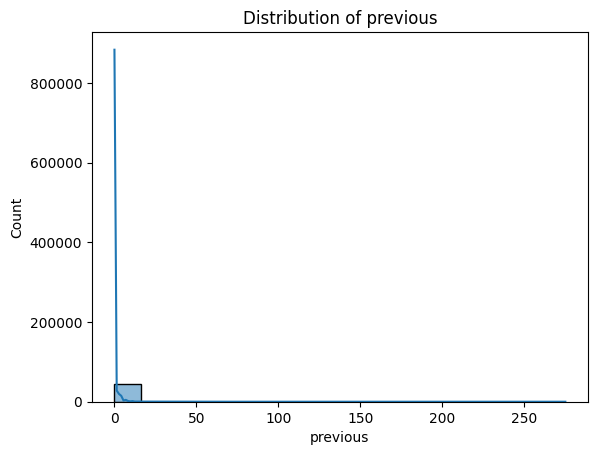

In [ ]:
# Univariate Analysis (Numerical)
num_cols = data.select_dtypes(include=['int64','float64']).columns


for col in num_cols:
  sns.histplot(data[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

### Histograms for:

age

balance

duration

campaign

pdays

previous

### Observations

Duration is heavily skewed.

Balance contains extreme values..

Campaign contacts mostly < 5.

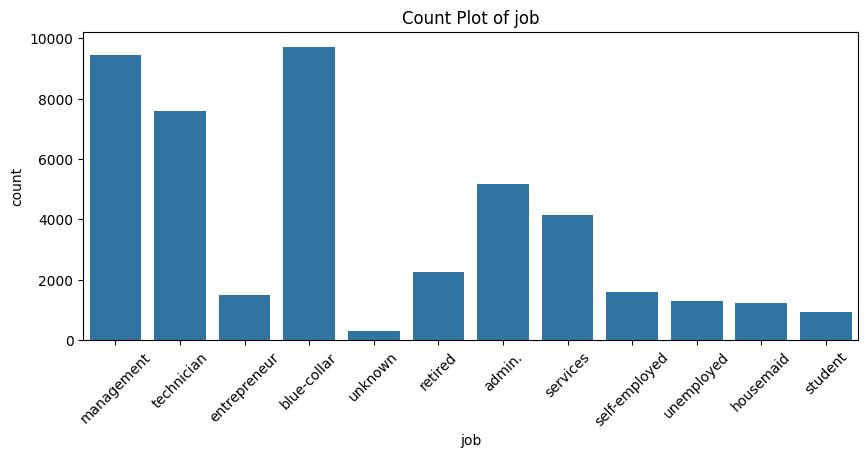

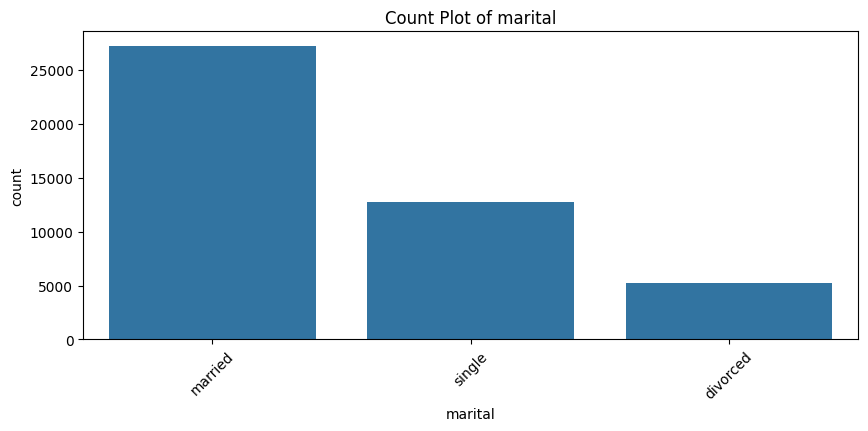

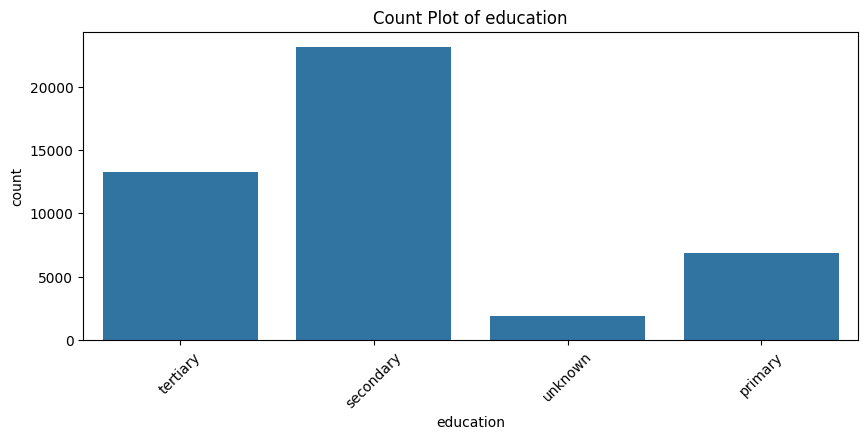

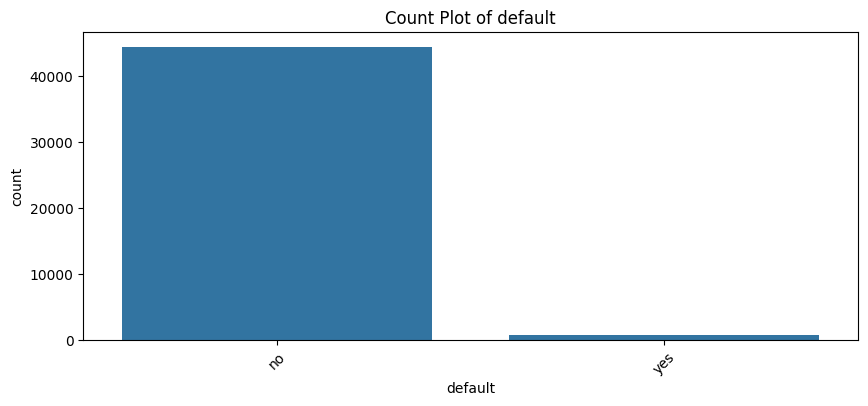

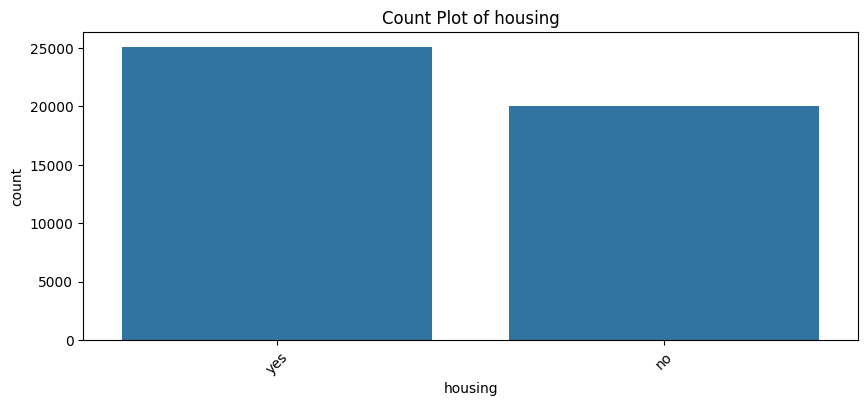

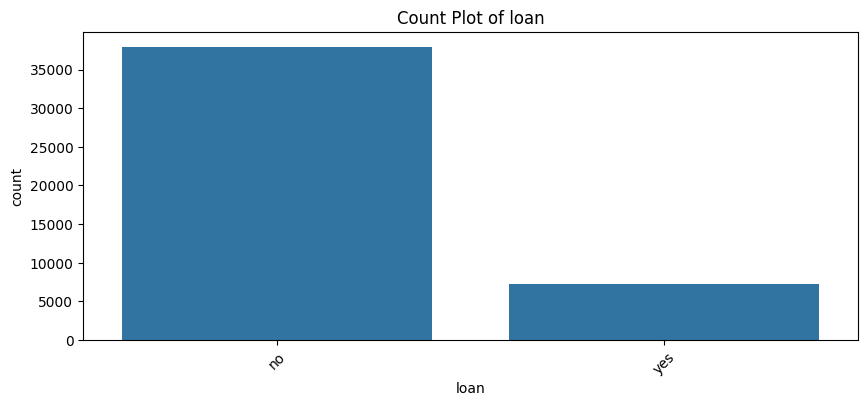

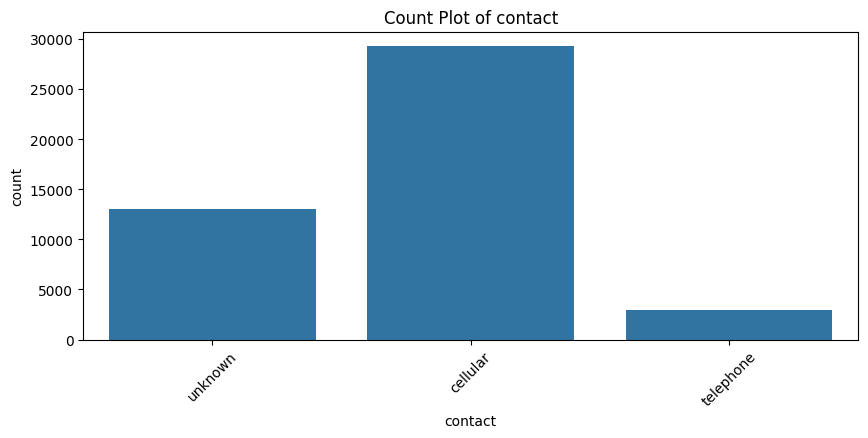

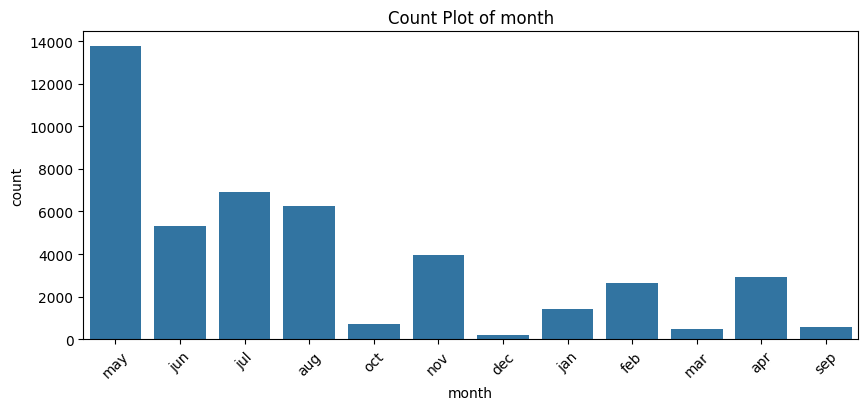

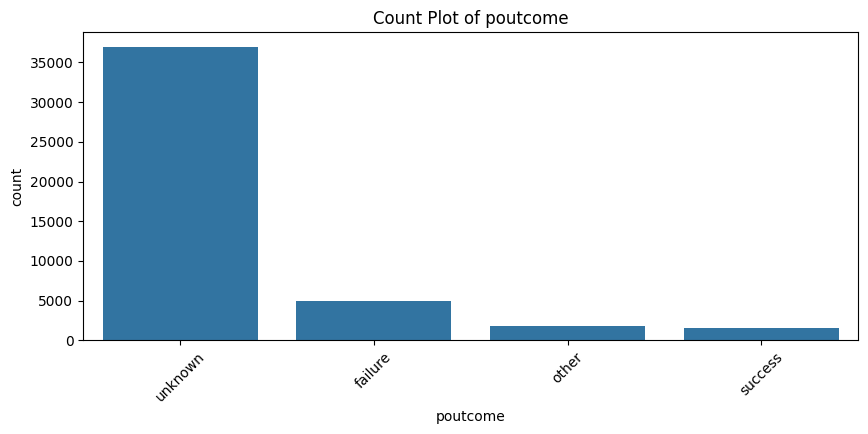

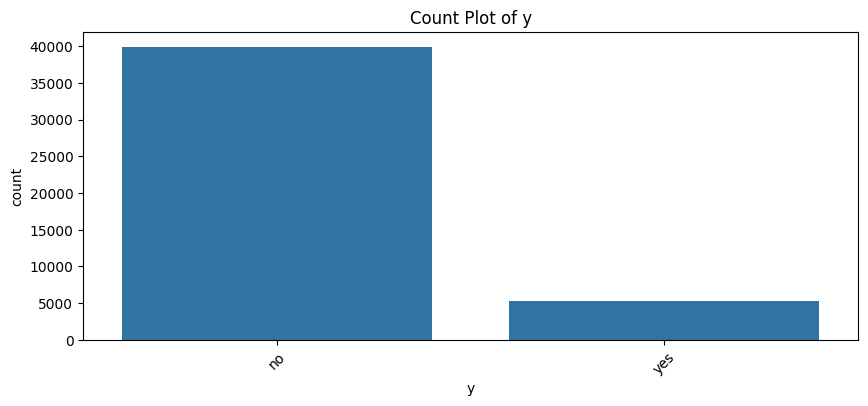

In [ ]:
# Univariate Analysis (Categorical)
cat_cols = data.select_dtypes(include='object').columns


for col in cat_cols:
  plt.figure(figsize=(10,4))
  sns.countplot(x=col, data=data)
  plt.xticks(rotation=45)
  plt.title(f'Count Plot of {col}')
  plt.show()

### Count plots for:

job

education

marital

housing

loan

contact

month

poutcome

### Observastions

Customers contacted via cellular and with successful previous outcomes subscribe more.

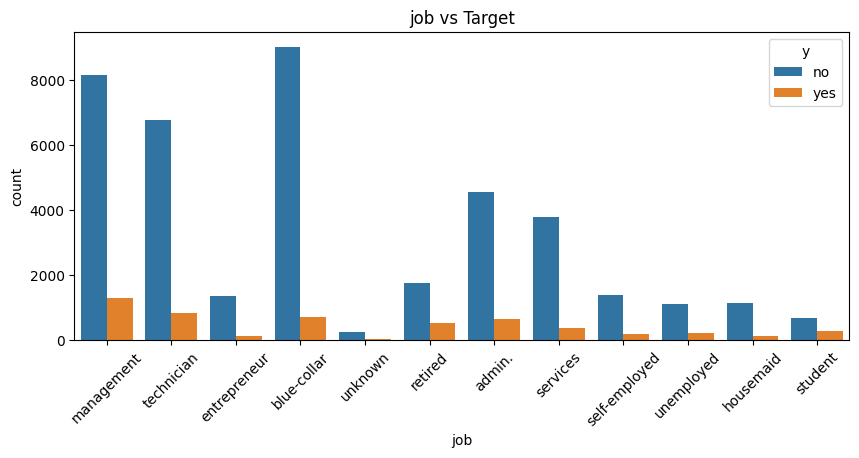

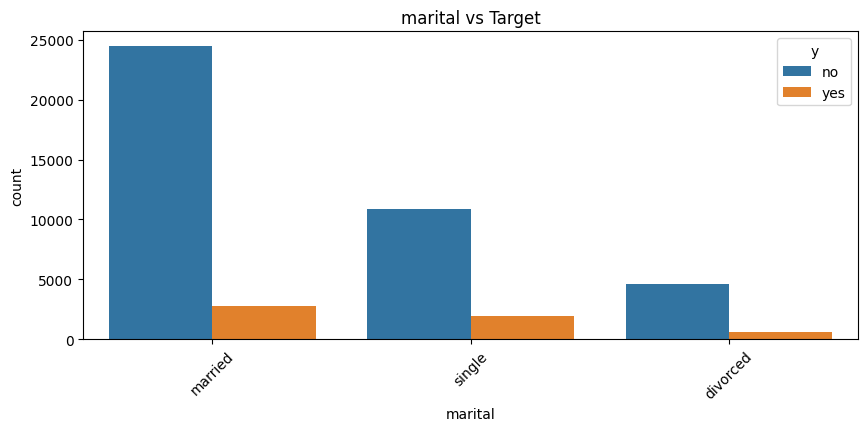

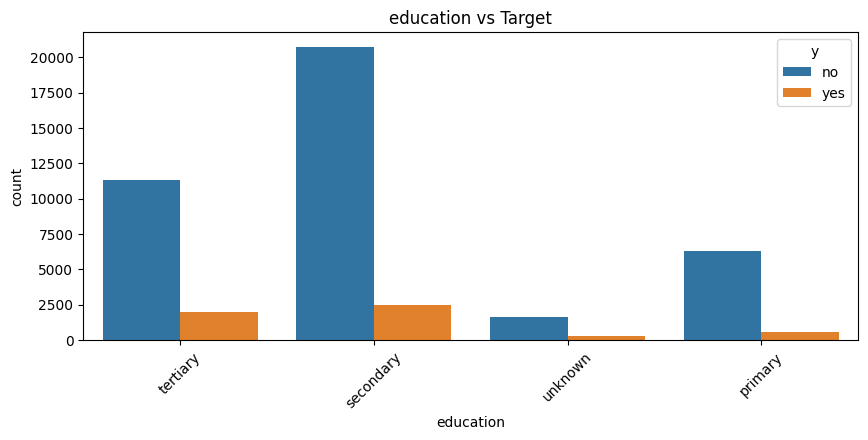

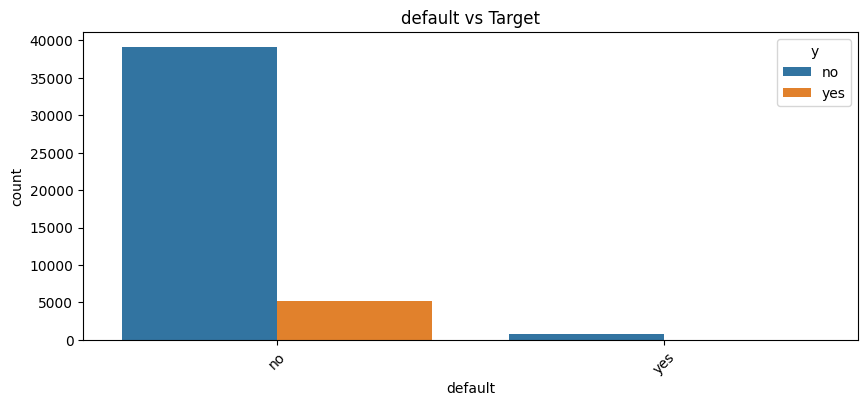

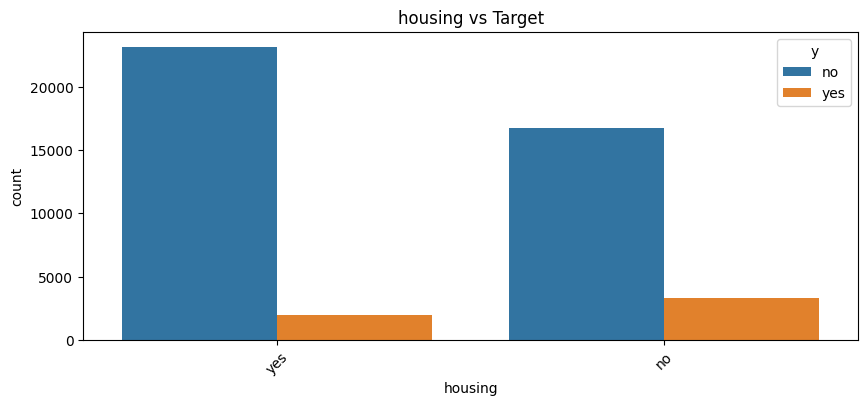

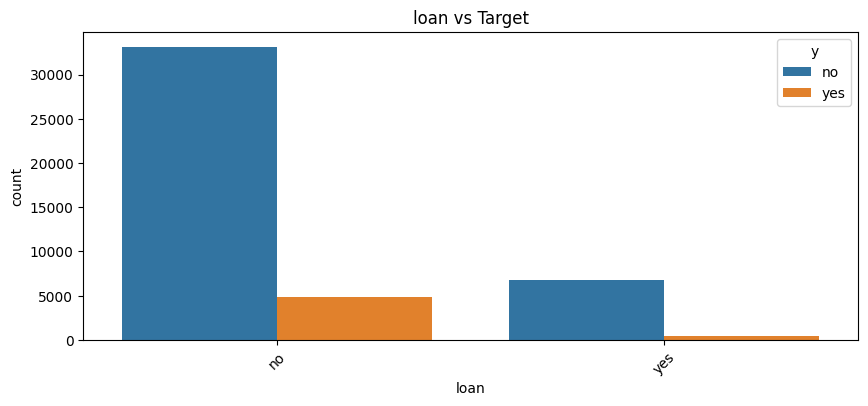

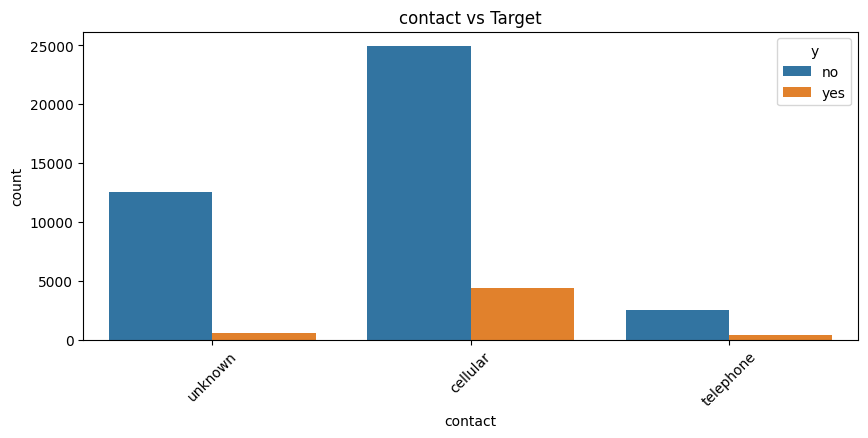

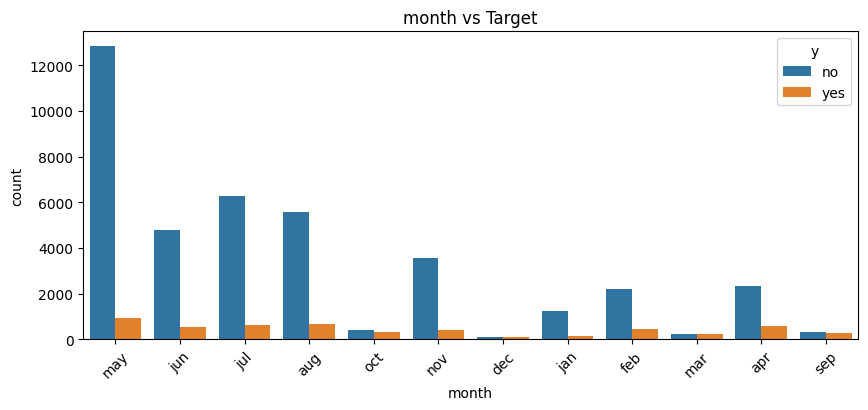

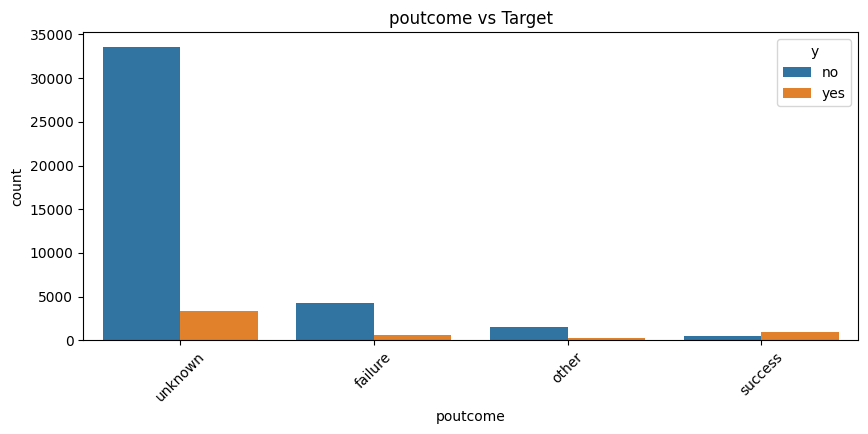

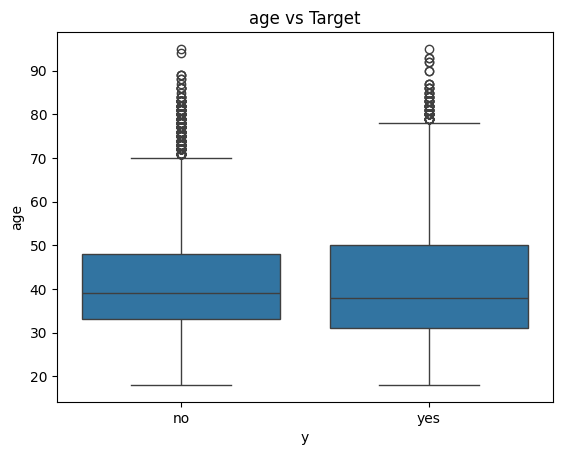

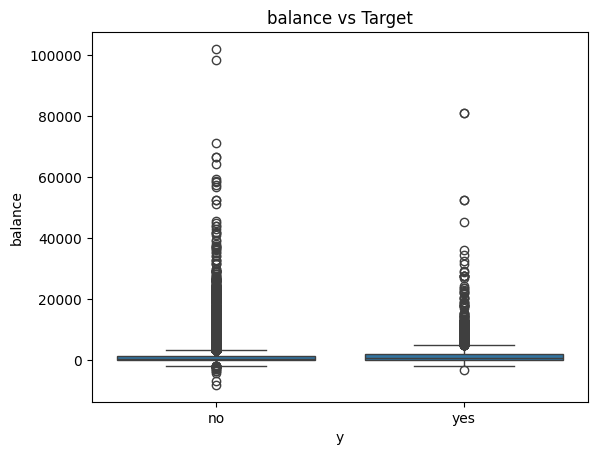

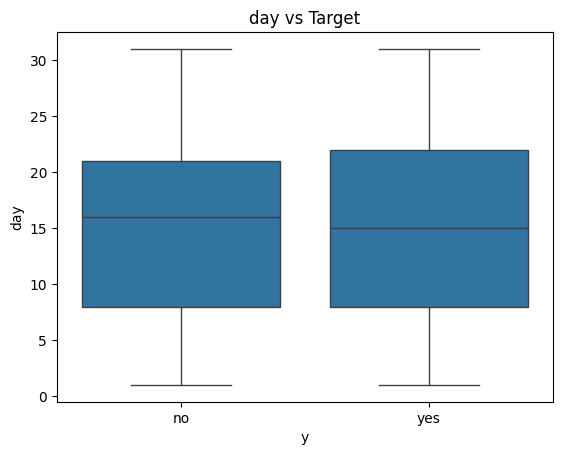

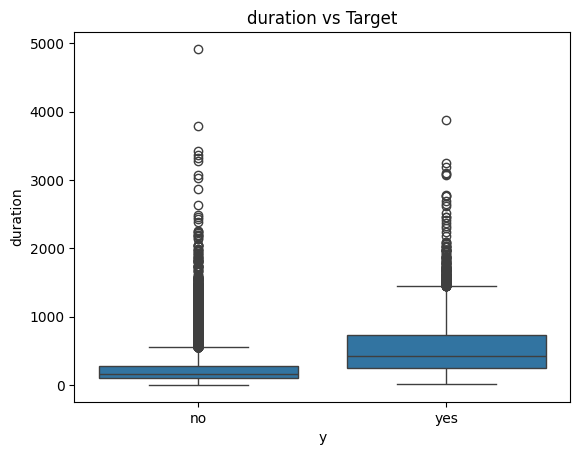

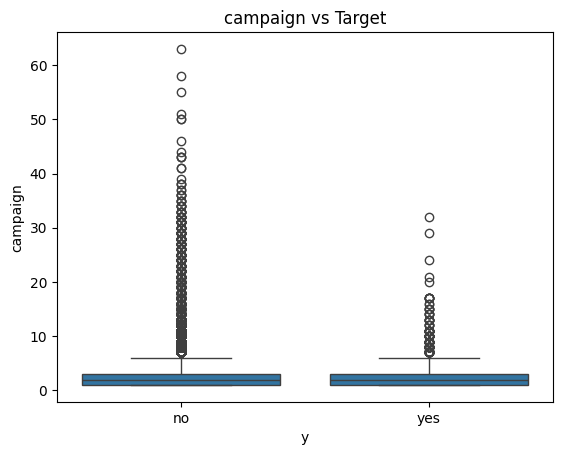

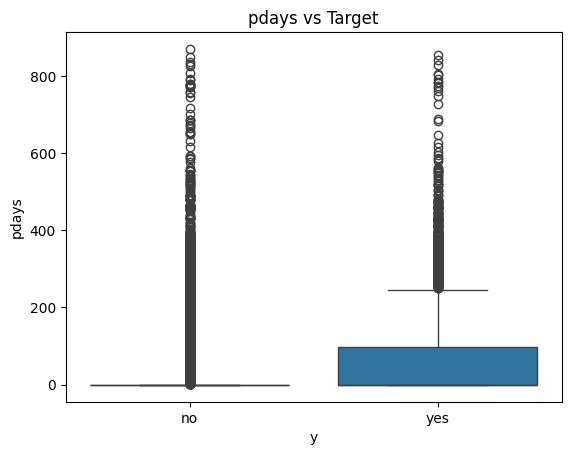

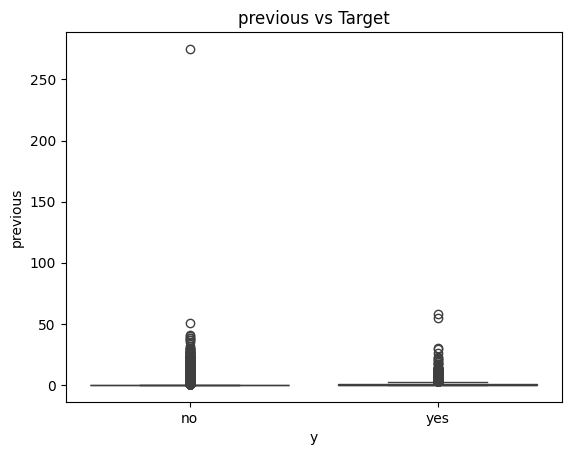

In [ ]:
# Bivariate Analysis with Target
for col in cat_cols:
  if col != 'y':
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue='y', data=data)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Target')
    plt.show()


for col in num_cols:
  sns.boxplot(x='y', y=col, data=data)
  plt.title(f'{col} vs Target')
  plt.show()

## Bivariate Analysis
###Categorical vs Target

####Plots like:

job vs y

education vs y

poutcome vs y

####Observations:-

Previous campaign outcome (poutcome) has a very strong impact on subscription.

Numerical vs Target

###Boxplots show:

Higher duration → higher chance of “Yes”

Balance slightly higher for subscribers

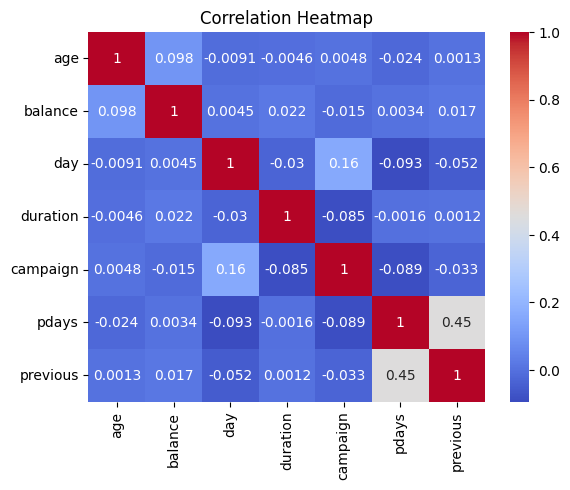

In [ ]:
# Correlation Analysis
corr = data[num_cols].corr()


sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Correlation Heatmap

####Observations:-
Duration strongly correlated with target

Weak correlation among most numerical features

“Duration is the most influential numerical feature, but it is only known after the call — so it must be handled carefully during modeling.”

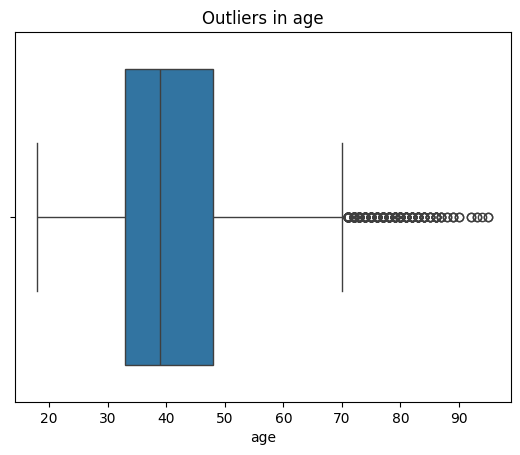

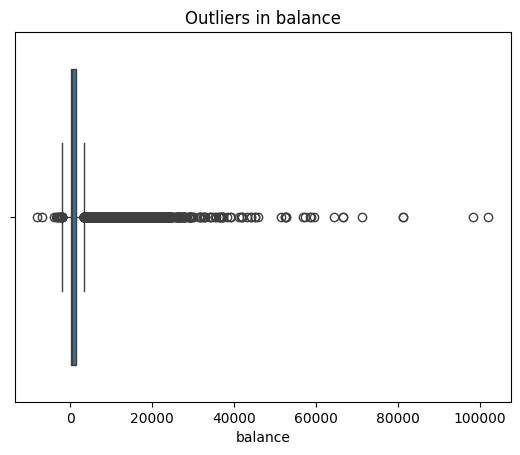

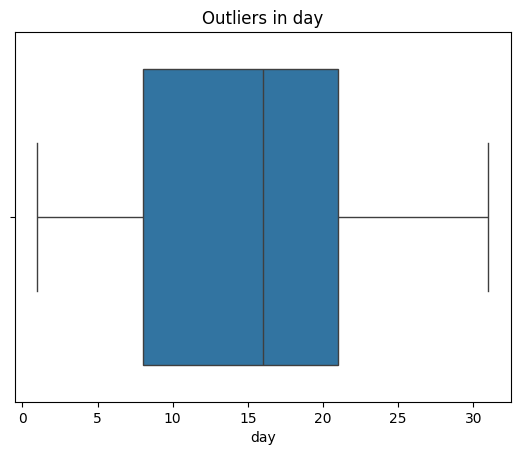

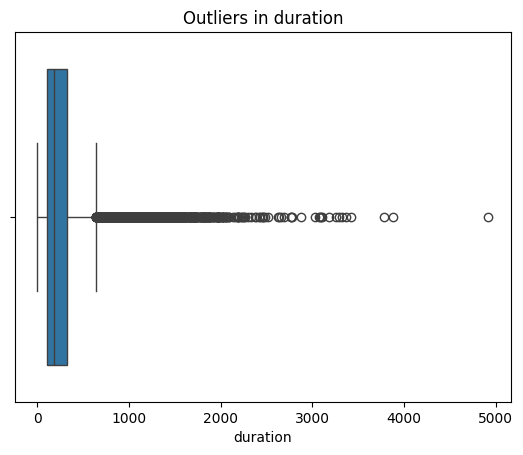

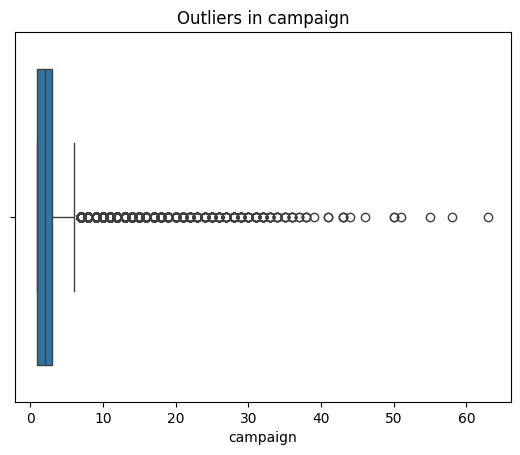

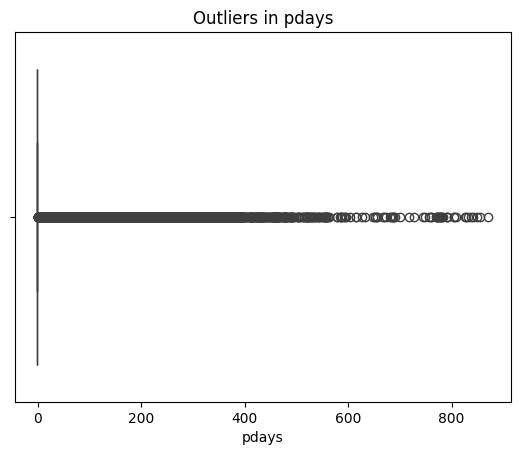

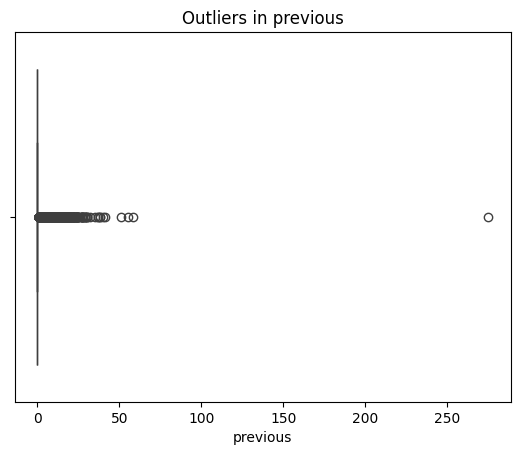

In [ ]:
# Outlier Detection
for col in num_cols:
  sns.boxplot(x=data[col])
  plt.title(f'Outliers in {col}')
  plt.show()

###Outlier Analysis

Boxplots show:

Strong outliers in balance

Strong outliers in duration

###Conclusion

Outlier treatment or log transformation is recommended.

## Final EDA Summary (Use this slide verbatim)

• Dataset is clean with no missing values.

• Target variable is highly imbalanced.

• Call duration is the strongest predictor.

• Previous campaign outcome significantly affects subscription.

• Several numerical features contain outliers.

### After EDA Feature Engineering need to be done

In [ ]:
#Target Encoding
data['y'] = data['y'].map({'no': 0, 'yes': 1})

In [ ]:
#Split Feature and Target
X = data.drop('y', axis=1)
y = data['y']


In [ ]:
#Identify Column Types
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols



['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
# Outlier Treatment(IQR Capping)
def iqr_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[column] = np.where(
        df[column] < lower, lower,
        np.where(df[column] > upper, upper, df[column])
    )


In [ ]:
# Apply Outlier Treatment
for col in num_cols:
    iqr_capping(X, col)

In [ ]:
# Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(36168, 16) (9043, 16)
(36168,) (9043,)


In [ ]:
#OneHotEncoding (Categorical Variables Only)
ohe = OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False)
X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])
encoded_cat_cols = ohe.get_feature_names_out(cat_cols)
encoded_cat_cols

array(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'], dtype=object)

In [ ]:
# Scaling Numerical Variables
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

X_train_processed = np.hstack((X_train_num, X_train_cat))
X_test_processed = np.hstack((X_test_num, X_test_cat))
print(X_train_processed)
print(X_test_processed)

[[-0.46382567 -0.06316345  1.58212355 ...  0.          0.
   1.        ]
 [-1.61741215  2.14848811 -1.2983841  ...  0.          0.
   0.        ]
 [ 0.30523198 -0.5878036  -0.45823603 ...  0.          0.
   1.        ]
 ...
 [ 0.40136419 -0.72810444  1.10203894 ...  0.          0.
   1.        ]
 [-1.32901553  1.38065983 -1.17836295 ...  0.          0.
   1.        ]
 [ 1.84334729 -0.38883148  0.38191203 ...  0.          0.
   0.        ]]
[[-0.07929684 -0.25108156 -0.93832064 ...  0.          0.
   1.        ]
 [ 0.30523198 -0.4738623   1.7021447  ...  0.          0.
   1.        ]
 [-0.9444867  -0.49256908  0.50193318 ...  0.          0.
   1.        ]
 ...
 [-0.8483545   0.02441829  0.74197549 ...  0.          0.
   1.        ]
 [-2.00194098 -0.79527879 -1.65844755 ...  0.          0.
   0.        ]
 [-0.17542905 -0.48661692 -0.57825719 ...  0.          0.
   0.        ]]


In [ ]:
# Handle Imbalanced Data (SMOTE)
from imblearn.over_sampling import SMOTE

print("Before SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_processed, y_train
)

print("\nAfter SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Before SMOTE:
y
0    31937
1     4231
Name: count, dtype: int64

After SMOTE:
y
0    31937
1    31937
Name: count, dtype: int64


## Apply Random Forest Model

In [ ]:
X_train_smote, y_train_smote
X_test_processed, y_test


(array([[-0.07929684, -0.25108156, -0.93832064, ...,  0.        ,
          0.        ,  1.        ],
        [ 0.30523198, -0.4738623 ,  1.7021447 , ...,  0.        ,
          0.        ,  1.        ],
        [-0.9444867 , -0.49256908,  0.50193318, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [-0.8483545 ,  0.02441829,  0.74197549, ...,  0.        ,
          0.        ,  1.        ],
        [-2.00194098, -0.79527879, -1.65844755, ...,  0.        ,
          0.        ,  0.        ],
        [-0.17542905, -0.48661692, -0.57825719, ...,  0.        ,
          0.        ,  0.        ]]),
 1392     0
 7518     0
 12007    0
 5536     0
 29816    0
         ..
 12636    0
 13364    0
 16102    0
 42097    0
 31033    0
 Name: y, Length: 9043, dtype: int64)

In [ ]:
# Build Random Forest Model, Training and Predictions
rf = RandomForestClassifier(random_state=42,n_jobs=-1)
param_dist = {                                                     # Hyperparameter Search)
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


In [ ]:
# Randomized SearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                 # balanced speed + performance
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [ ]:
rf_random.fit(X_train_smote, y_train_smote)           #Fit the model

print("Best Hyperparameters:\n")
print(rf_random.best_params_)                         # Best Hyper Parameter

#Train Final Tuned Model
best_rf = rf_random.best_estimator_
best_rf.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters:

{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [ ]:
#Make Predictions
y_pred_tuned = best_rf.predict(X_test_processed)
y_prob_tuned = best_rf.predict_proba(X_test_processed)[:, 1]


In [ ]:
# Model Evaluation
print("RANDOM FOREST MODEL PERFORMANCE\n")

print("Accuracy :", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall   :", recall_score(y_test, y_pred_tuned))
print("F1 Score :", f1_score(y_test, y_pred_tuned))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_tuned))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_tuned))

RANDOM FOREST MODEL PERFORMANCE

Accuracy : 0.8995908437465443
Precision: 0.5829646017699115
Recall   : 0.498109640831758
F1 Score : 0.5372069317023446
ROC-AUC  : 0.927018050148376

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7985
           1       0.58      0.50      0.54      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.73      0.74      9043
weighted avg       0.89      0.90      0.90      9043



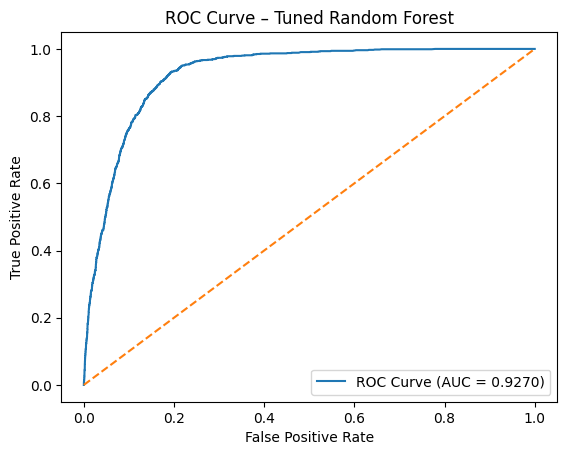

Area Under the ROC Curve (AUC): 0.9270179317789853


In [ ]:
# Step 1: Predict probabilities
y_prob = best_rf.predict_proba(X_test_processed)[:, 1]

# Step 2: Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Step 3: Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Tuned Random Forest')
plt.legend(loc='lower right')
plt.show()

print("Area Under the ROC Curve (AUC):", roc_auc)
